In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Обобщени полиноми. Интерполиране с обобщени полиноми.

### Задача 1

В таблицата са дадени данни за развитието на бактериална популация

|  t, h  |  1 | 2 | 3 | 4 | 5 |
| --- | --- | --- | --- | --- | --- | 
| бр. клетки (x1000)|  1 |12| 110 | 1037 | 12218 |

Да се намери подходяща функция, която интерполира данните.

Test for time = 5h 
12218.000000000002
Test for time = 4.5h 
3418.4034944161504
Test for time = 3.76h 
597.50996254295


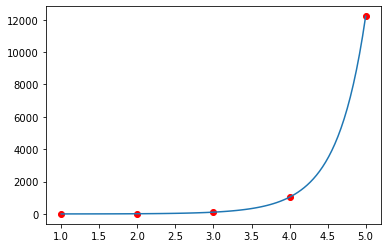

In [196]:
nodes1 = np.array([1,2,3,4,5])
values1 = np.array([1,12,110,1037,12218])
def exp(t):
    result = []
    for i in range(len(nodes1)):
        result.append((math.e)**(i*t))
    return result

def exp_poly(nodes, t):
    result = 0
    for i in range(len(nodes)):
        result += nodes[i]*(math.e**(i*t))
    return result

list_nodes1 = []
for element in nodes1:
    list_nodes1.append(exp(element))
array_nodes1 = np.array(list_nodes1)
solution_of_system = np.linalg.solve(array_nodes1, values1)
print("Test for time = 5h ")
print (exp_poly(solution_of_system, 5))
print("Test for time = 4.5h ")
print (exp_poly(solution_of_system, 4.5))
print("Test for time = 3.76h ")
print (exp_poly(solution_of_system, 3.76))
x_axis = np.linspace(1,5,100)
plt.scatter(nodes1,values1, color = 'red')
plt.plot(x_axis, exp_poly(solution_of_system, x_axis))
plt.show()

### Задача 2

В таблицата са дадени данни за зависимостта между нивото на алкохол в кръвта (BAC - Blood Alcohol Level) и относителния риск за попадане в ПТП (т.е. колко пъти се увеличава рискът спрямо водач, който не е употребявал алкохол)

|  BAC  |  0 | 0.03 | 0.07 | 0.15 | 0.21 | 0.27 |
| --- | --- | --- | --- | --- | --- | --- |
| relative risk of crashing|  1 |1.06| 2.09 | 22.1 | 99.78 | 328.602 |

Да се построи интерполационен полином по подходящ базис, който описва данните от таблицата. Да се начертае графиката му, заедно с данните от таблицата.

Test for BAC = 0.16 
29.17357710158103
Test for BAC = 0.25 
227.13426026397792
Test for BAC = 0 
0.999999999992724


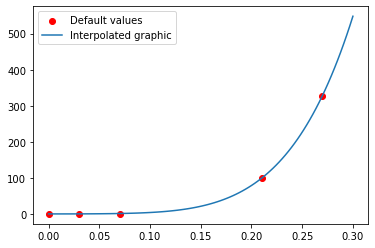

In [194]:
nodes1 = np.array([0.,0.03,0.07,0.21,0.27])
values1 = np.array([1.,1.06,2.09,99.78,328.602])
def exp(t):
    result = []
    for i in range(len(nodes1)):
        result.append((math.e)**(i*t))
    return result

def exp_poly(nodes, t):
    result = 0
    for i in range(len(nodes)):
        result += nodes[i]*(math.e**(i*t))
    return result

list_nodes1 = []
for element in nodes1:
    list_nodes1.append(exp(element))
array_nodes1 = np.array(list_nodes1)
solution_of_system = np.linalg.solve(array_nodes1, values1)
print("Test for BAC = 0.16 ")
print (exp_poly(solution_of_system, 0.16))
print("Test for BAC = 0.25 ")
print (exp_poly(solution_of_system, 0.25))
print("Test for BAC = 0 ")
print (exp_poly(solution_of_system, 0))
x_axis = np.linspace(0,0.3,100)
plt.scatter(nodes1,values1, color = 'red')
plt.plot(x_axis, exp_poly(solution_of_system, x_axis))
plt.legend(['Default values', 'Interpolated graphic'])
plt.show()

### Задача 3

В таблицата са дадени данни от сигнал на акселерометър в 5 момента от време:

|  t, ms  |  1 | 1.5 | 3 | 4 | 6 |
| --- | --- | --- | --- | --- | --- | 
| ускорение, $m/s^2$|  0 |1| 1.2 | 4 | 2 |

Да се намери обощен полином по подходящ базис, който интерполира тези данни, ако е известно, че сигналът се описва от периодична функция с период а) $T=2\pi$; б) $T=8$.
Да се начертае графиката на полинома в интервала $[0, 4 \pi]$ заедно с точките в една координатна система във всеки от случаите.

A)
Test for time = 1 ms
1.1102230246251565e-16
Test for time = 3.7 ms
2.7751387484450456
Test for time = 5.15 ms
5.848982893686041


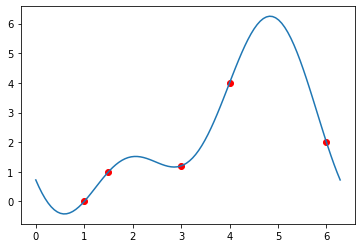

B)
Test for time = 1 ms
0.6633621426234662
Test for time = 3.7 ms
5.88659400839571
Test for time = 5.15 ms
-1.4641613135377876


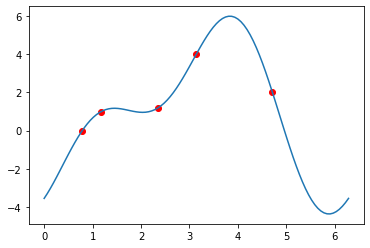

In [192]:
# a) T = 2Pi
nodes1 = np.array([1.0 , 1.5, 3, 4, 6])
values1 = np.array([0., 1, 1.2, 4, 2])
def trig(t):
    result = [1]
    for i in range(1,len(nodes1)):
        if i%2==0:
            result.append(math.sin(((i+1)//2)*t))
        else:
            result.append(math.cos(((i+1)//2)*t))
    return result

def trig_poly(nodes, t):
    result = nodes[0]
    for i in range(1,len(nodes)):
        if i%2==0:
            result+= nodes[i] * np.sin((i+1)//2 * t)
        else:
            result+= nodes[i] * np.cos((i+1)//2 * t)
    return result
list_nodes1 = []
for element in nodes1:
    list_nodes1.append(trig(element))
array_nodes1 = np.array(list_nodes1)
solution_of_system = np.linalg.solve(array_nodes1, values1)
print("A)")
print("Test for time = 1 ms")
print(trig_poly(solution_of_system, 1))
print("Test for time = 3.7 ms")
print(trig_poly(solution_of_system, 3.7))
print("Test for time = 5.15 ms")
print(trig_poly(solution_of_system, 5.15))
x_axis = np.linspace(0, 2*math.pi, 100)
plt.plot(x_axis, trig_poly(solution_of_system, x_axis))
plt.scatter(nodes1,values1, color= "red")
plt.show()
# b) T = 8Pi
print("B)")
for i in range(len(nodes1)):
    nodes1[i] = (2*math.pi / 8)*nodes1[i]
list_nodes1 = []
for element in nodes1:
    list_nodes1.append(trig(element))
array_nodes1 = np.array(list_nodes1)
solution_of_system = np.linalg.solve(array_nodes1, values1)
print("Test for time = 1 ms")
print(trig_poly(solution_of_system, 1))
print("Test for time = 3.7 ms")
print(trig_poly(solution_of_system, 3.7))
print("Test for time = 5.15 ms")
print(trig_poly(solution_of_system, 5.15))
x_axis = np.linspace(0, 2*math.pi, 100)
plt.plot(x_axis, trig_poly(solution_of_system, x_axis))
plt.scatter(nodes1,values1, color= "red")
plt.show()

### Задача 4

В таблицата са дадени данни за средните месечни количества слънчева радиация на територията на България, като лиспват данни за м. август

|  t, месец  |  Я | Ф | М | А | М | Ю | Ю | A | С | O | Н | Д |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| слънчева радиация, $W/m^2$|45.9| 78.2 | 123.5| 172.6| 223.5| 255.3| 286.0| | 183.9| 116.2 | 57.8| 37.7|

Данните са осреднени на 30 дни, т.е. можем да считаме, че разстоянието между измерванията в два съседни месеца е 30. Като се има предвид това, както и факта, че разглежданият процес е с период 365 дни, да се намери обобщен полином по подходящ базис, който описва данните в таблицата. Като се използва така намерения полином, да се пресметне приближено количеството слънчева радиация, съответстващо на м. август. Да се сравни с действителната стойност - $257.9 W/m^2$.

February: 
78.2
March: 
123.50000000000001
August: 
260.7935639691475


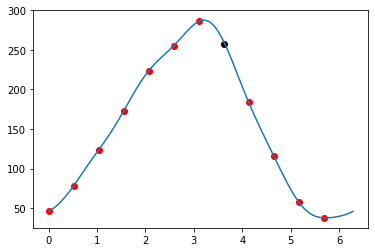

Unknown point is in black


In [202]:
nodes1 = np.array([0.0 , 30, 60, 90, 120, 150, 180, 240, 270, 300, 330])
values1 = np.array([45.9, 78.2, 123.5, 172.6, 223.5, 255.3, 286, 183.9, 116.2, 57.8, 37.7])
def trig(t):
    result = [1]
    for i in range(1,len(nodes1)):
        if i%2==0:
            result.append(math.sin(((i+1)//2)*t))
        else:
            result.append(math.cos(((i+1)//2)*t))
    return result
def trig_poly(solution_of_system, t):
    result = solution_of_system[0]
    for i in range(1,len(solution_of_system)):
        if i%2==0:
            result+= solution_of_system[i] * np.sin((i+1)//2 * t)
        else:
            result+= solution_of_system[i] * np.cos((i+1)//2 * t)
    return result
for i in range(len(nodes1)):
    a= (2*math.pi / 365) * nodes1[i]
    nodes1[i] = a
list_nodes1 = []
for element in nodes1:
    list_nodes1.append(trig(element))
array_nodes1 = np.array(list_nodes1)
solution_of_system = np.linalg.solve(array_nodes1, values1)
print("February: ")
print(trig_poly(solution_of_system,nodes1[1]))
print("March: ")
print(trig_poly(solution_of_system,nodes1[2]))
print("August: ")
print(trig_poly(solution_of_system,(2*math.pi / 365)*210))
x_axis = np.linspace(0, 2*math.pi, 100)
plt.plot(x_axis, trig_poly(solution_of_system, x_axis))
plt.scatter(nodes1,values1, color= "red")
plt.scatter(np.array([(2*math.pi / 365) * 210]), np.array([257.9]), color = "black")
plt.show()
print("Unknown point is in black")